In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files 

In [ ]:
#files.upload()

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        110           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        214           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        601           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3602           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      29102           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       7503           False  
connectx

In [ ]:
!kaggle datasets download "austinreese/craigslist-carstrucks-data"


 93% 249M/267M [00:06<00:00, 39.7MB/s]
100% 267M/267M [00:06<00:00, 44.6MB/s]


In [ ]:
!unzip craigslist-carstrucks-data.zip

Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math
import plotly.graph_objects as go
import plotly.express as px

from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from string import ascii_letters

#from colorama import Fore, Back, Style
#y_ = Fore.YELLOW
#r_ = Fore.RED
#g_ = Fore.GREEN
#b_ = Fore.BLUE
#_ = Fore.MAGENTA


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style

import lightgbm as lgbm
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [ ]:
df = pd.read_csv("vehicles.csv")


In [ ]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [ ]:
cols=['price','region','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','state']
df_temp=df[cols]
df_temp.head()

,price,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,35990,auburn,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,al
1,7500,auburn,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,al
2,4900,auburn,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,al
3,2000,auburn,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,al
4,19500,auburn,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al


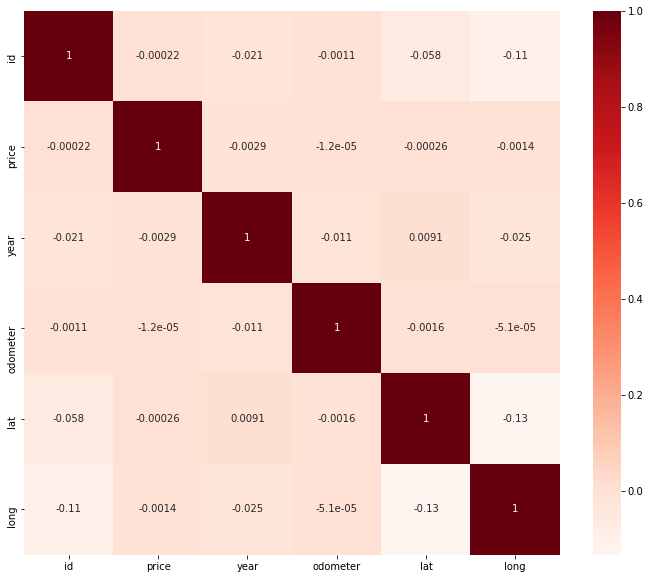

In [ ]:
#Using Pearson Correlation
df1=df.drop('Unnamed: 0',axis=1)
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.drop(['id', 'url','region_url', 'image_url', 'lat', 'long', 'description'], axis=1, inplace=True)

In [ ]:
#df.drop(df.columns[[0]], axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   region        458213 non-null  object 
 2   price         458213 non-null  int64  
 3   year          457163 non-null  float64
 4   manufacturer  439993 non-null  object 
 5   model         453367 non-null  object 
 6   condition     265273 non-null  object 
 7   cylinders     287073 non-null  object 
 8   fuel          454976 non-null  object 
 9   odometer      402910 non-null  float64
 10  title_status  455636 non-null  object 
 11  transmission  455771 non-null  object 
 12  VIN           270664 non-null  object 
 13  drive         324025 non-null  object 
 14  size          136865 non-null  object 
 15  type          345475 non-null  object 
 16  paint_color   317370 non-null  object 
 17  state         458213 non-null  object 
 18  post

In [ ]:
print(df.isnull().sum())

Unnamed: 0           0
region               0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
state                0
posting_date        28
dtype: int64


In [ ]:
null_val = df.isna().sum()
def na_filter(na, threshold = .55): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df[na_filter(null_val)]
df_cleaned.columns

Index(['Unnamed: 0', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'state',
       'posting_date'],
      dtype='object')

In [ ]:
df_cleaned.manufacturer.unique()

array(['chevrolet', 'hyundai', 'bmw', 'ford', 'toyota', 'jeep', 'ram',
       nan, 'honda', 'dodge', 'lexus', 'mercedes-benz', 'cadillac', 'gmc',
       'subaru', 'infiniti', 'mazda', 'mini', 'nissan', 'volkswagen',
       'kia', 'lincoln', 'mitsubishi', 'buick', 'audi', 'rover',
       'chrysler', 'fiat', 'acura', 'volvo', 'pontiac', 'tesla', 'saturn',
       'mercury', 'datsun', 'porsche', 'jaguar', 'ferrari', 'alfa-romeo',
       'harley-davidson', 'land rover', 'aston-martin', 'morgan',
       'hennessey'], dtype=object)

In [ ]:
df_cleaned.model.unique()

array(['corvette grand sport', 'sonata', 'x3 3.0i', ...,
       "32' 2 car trailer", 'bluebird 4300', 'caravana'], dtype=object)

In [ ]:
df_cleaned.cylinders.unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       'other', '5 cylinders', '3 cylinders', '12 cylinders'],
      dtype=object)

In [ ]:
df_cleaned.fuel.unique()

array(['gas', 'diesel', 'other', 'hybrid', nan, 'electric'], dtype=object)

In [ ]:
df_cleaned.title_status.unique()

array(['clean', 'lien', 'missing', 'salvage', 'rebuilt', nan,
       'parts only'], dtype=object)

In [ ]:
df_cleaned.transmission.unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [ ]:
df_cleaned.drive.unique()

array(['rwd', 'fwd', nan, '4wd'], dtype=object)

In [ ]:
df_cleaned.type.unique()

array(['other', 'sedan', 'SUV', 'pickup', 'coupe', 'van', nan, 'truck',
       'mini-van', 'wagon', 'convertible', 'hatchback', 'bus', 'offroad'],
      dtype=object)

In [ ]:
df_cleaned.paint_color.unique()

array([nan, 'blue', 'red', 'silver', 'black', 'white', 'grey', 'orange',
       'green', 'yellow', 'custom', 'brown', 'purple'], dtype=object)

In [ ]:
df_cleaned.describe()

,Unnamed: 0,price,year,odometer
count,458213.000000,4.582130e+05,457163.000000,4.029100e+05
mean,229106.000000,4.042093e+04,2010.746067,1.016698e+05
std,132274.843786,8.194599e+06,8.868136,3.228623e+06
min,0.000000,0.000000e+00,1900.000000,0.000000e+00
25%,114553.000000,4.900000e+03,2008.000000,4.087700e+04
50%,229106.000000,1.099500e+04,2013.000000,8.764100e+04
75%,343659.000000,2.149500e+04,2016.000000,1.340000e+05
max,458212.000000,3.615215e+09,2021.000000,2.043756e+09


In [ ]:
print(df.isnull().sum())

Unnamed: 0           0
region               0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
state                0
posting_date        28
dtype: int64


In [ ]:
vehicles_df = df_cleaned[df_cleaned['price']>0]

In [ ]:
df_cleaned=""
df=""

In [ ]:
#vehicles_df['year'] = vehicles_df['year'].replace(0, np.nan)
vehicles_df = vehicles_df.dropna(axis=0, subset=['year','manufacturer','model','odometer','posting_date'])
vehicles_corr_df = vehicles_df.dropna(axis=0)

In [ ]:
print(vehicles_corr_df.isnull().sum())

Unnamed: 0      0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
state           0
posting_date    0
dtype: int64


In [ ]:
vehicles_df.describe()

,Unnamed: 0,price,year,odometer
count,360046.000000,3.600460e+05,360046.000000,3.600460e+05
mean,229693.111564,2.732361e+04,2011.365800,1.029650e+05
std,132682.914258,6.030909e+06,7.389093,3.414882e+06
min,0.000000,1.000000e+00,1911.000000,0.000000e+00
25%,115278.250000,6.500000e+03,2008.000000,4.200000e+04
50%,227155.500000,1.299500e+04,2013.000000,8.942000e+04
75%,344287.750000,2.348975e+04,2016.000000,1.357430e+05
max,458211.000000,3.615215e+09,2021.000000,2.043756e+09


In [ ]:
#label Encoding
le = preprocessing.LabelEncoder()


In [ ]:
#vehicles_df[['region','manufacturer','model','cylinders','fuel','title_status','transmission','drive'
#             ,'type','paint_color','state']] = vehicles_df[['region','manufacturer','model','cylinders','fuel','title_status',
#                                                            'transmission','drive','type','paint_color','state']].apply(lambda x: le.transform([x])[0] if type(x) == str else x, axis=1)

In [ ]:
vehicles_corr_df = vehicles_corr_df[['price','region','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','state']]

In [ ]:
vehicles_corr_df[['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive'
             ,'type','paint_color','state']] = vehicles_corr_df[['region','manufacturer','model','condition','cylinders','fuel','title_status',
                                                            'transmission','drive','type','paint_color','state']].apply(le.fit_transform)

In [ ]:
vehicles_corr_df

,price,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
6,39990,16,2012.0,13,4752,2,6,2,9692.0,0,2,2,3,1,1
7,41990,16,2012.0,7,1460,2,6,2,2778.0,0,2,2,3,8,1
11,36990,16,2013.0,4,4405,2,6,2,50956.0,0,2,2,3,0,1
16,33990,16,2012.0,7,1943,2,6,2,49245.0,0,0,2,7,10,1
19,47000,16,2020.0,20,3710,3,5,2,10500.0,0,0,0,8,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458195,20488,311,2010.0,14,5889,0,6,2,63812.0,0,0,0,10,0,48
458199,39990,311,2019.0,10,1584,2,6,2,4191.0,0,2,2,3,0,48
458202,4995,379,2005.0,5,5442,2,5,2,137962.0,0,0,1,0,5,48
458204,4495,379,2006.0,5,4230,2,5,2,121488.0,0,0,1,9,0,48


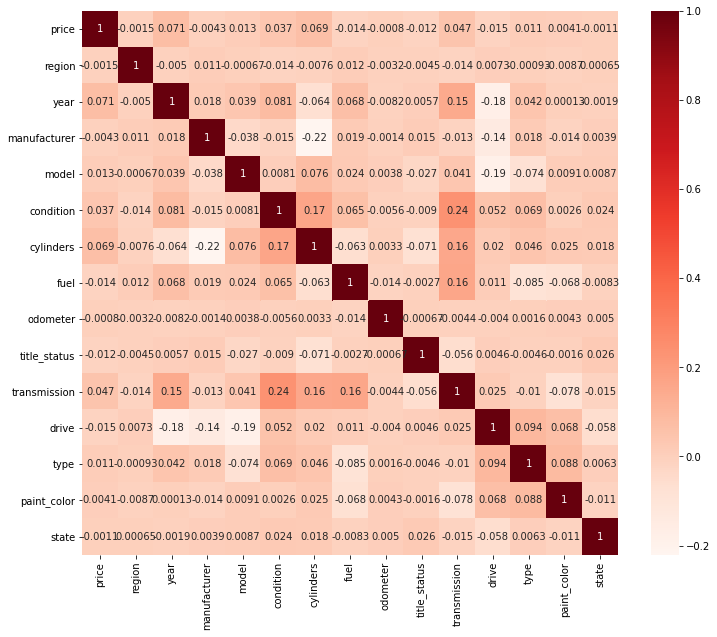

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = vehicles_corr_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
print(type(vehicles_df["posting_date"][0]))

<class 'str'>


In [ ]:
vehicles_df["age"]=vehicles_df["posting_date"].str[:4].astype(int)-vehicles_df["year"]

In [ ]:
vehicles_df

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,posting_date,age
0,0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,other,NaN,al,2020-12-02T08:11:30-0600,10.0
1,1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,sedan,NaN,al,2020-12-02T02:11:50-0600,6.0
2,2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,2020-12-01T19:50:41-0600,14.0
3,3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,pickup,blue,al,2020-12-01T15:54:45-0600,46.0
4,4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,pickup,blue,al,2020-12-01T12:53:56-0600,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458207,458207,wausau,19950,2017.0,audi,a4 premium plus quattro awd,NaN,NaN,gas,101270.0,clean,automatic,WAUENAF43HN008564,NaN,NaN,NaN,wi,2020-12-03T09:06:21-0600,3.0
458208,458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,NaN,4wd,SUV,silver,wi,2020-12-03T08:56:29-0600,6.0
458209,458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,NaN,4wd,SUV,white,wi,2020-12-03T08:48:08-0600,2.0
458210,458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,NaN,4wd,coupe,black,wy,2020-12-02T14:09:45-0700,6.0


In [ ]:
len(vehicles_df["model"].unique())

22285

In [ ]:
#import requests
#from urllib2 import Request, urlopen
#from requests.exceptions import HTTPError

In [ ]:
df_nhtsa = pd.DataFrame()
vin_list=set(vehicles_df["VIN"])

In [ ]:
vin_list.pop()

nan

In [ ]:
count=0

In [ ]:
#vinstr="ZARFAECN6J7593602"
#for vinstr in vin_list:#
#
#  url="https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVinValuesExtended/"+vinstr+"?format=json"
#  try:
#      response = requests.get(url)
##      response.raise_for_status()
#  except HTTPError as http_err:
#      print(f'HTTP error occurred: {http_err}')  # Python 3.6
#  except Exception as err:
#      print(f'Other error occurred: {err}')  # Python 3.6
#  else:
#      json_response=response.json()
#      #json_out.update(json_response)
#      #df_tmp=pd.json_normalize(json_response['Results'])
#      df_nhtsa=df_nhtsa.append(json_response['Results'], ignore_index=True)
#      #print(json_response['Results'])
#      count+=1
#      print(count)

In [ ]:
vehicles_df["condition"].unique()

array(['good', 'excellent', nan, 'like new', 'salvage', 'new', 'fair'],
      dtype=object)

In [ ]:
vehicles_df["title_status"].unique()

array(['clean', 'lien', 'missing', 'salvage', 'rebuilt', nan,
       'parts only'], dtype=object)

In [ ]:
vehicles_df["fuel"].unique()

array(['gas', 'diesel', 'other', 'hybrid', nan, 'electric'], dtype=object)

In [ ]:
vehicles_df["cylinders"].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       '5 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [ ]:
#vehicles_df.groupby(['cylinders']).mean()

(vehicles_df.groupby(['cylinders'], as_index=False).mean()
            .groupby('cylinders')['price'].median())

cylinders
10 cylinders    16735.103132
12 cylinders    26378.412500
3 cylinders     12568.774929
4 cylinders     10446.611587
5 cylinders      6681.447494
6 cylinders     18712.461468
8 cylinders     77334.236290
other           18844.477997
Name: price, dtype: float64

In [ ]:
(vehicles_df.groupby(['fuel'], as_index=False).mean()
            .groupby('fuel')['price'].mean())
#one hot on fuel

fuel
diesel      212408.243154
electric     25632.721902
gas          15780.918399
hybrid       15164.768031
other        23446.075026
Name: price, dtype: float64

In [ ]:
vehicles_df["transmission"].unique()
#oen hot encoding

array(['other', 'automatic', 'manual', nan], dtype=object)

In [ ]:
vehicles_df["drive"].unique()
(vehicles_df.groupby(['drive'], as_index=False).mean()
            .groupby('drive')['price'].mean())
#oen hot encoding

drive
4wd    54065.841007
fwd    10663.329083
rwd    18903.941588
Name: price, dtype: float64

In [ ]:
vehicles_df["paint_color"].unique()
(vehicles_df.groupby(['paint_color'], as_index=False).mean()
            .groupby('paint_color')['price'].mean())
#categorical
#tree based algo can handle

paint_color
black      19140.884451
blue       14827.779084
brown      12715.582407
custom     14411.196837
green      10599.885539
grey       23418.446919
orange     19188.627193
purple     12878.378641
red       143265.917193
silver     14642.553097
white      19654.455709
yellow     15184.114531
Name: price, dtype: float64

In [ ]:
#vehicles_df = vehicles_df.merge(df_nhtsa[['DriveType','EngineCylinders','Model','Trim','Trim2','VehicleType','VIN']], how='inner', left_on='vin',right_on='VIN').drop(columns= ['VIN'])

In [ ]:
#vehicles_df.to_csv("vehicles_nhtsa.csv")

In [ ]:
vehicles_clean_df=vehicles_df.dropna()
vehicles_clean_df.shape

(72055, 19)

In [ ]:
vehicles_clean_df.head()


,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,posting_date,age
6,6,auburn,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,coupe,blue,al,2020-11-30T13:34:00-0600,8.0
7,7,auburn,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,coupe,red,al,2020-11-29T07:39:33-0600,8.0
11,11,auburn,36990,2013.0,bmw,m3 coupe 2d,good,8 cylinders,gas,50956.0,clean,other,WBSKG9C51DE799269,rwd,coupe,black,al,2020-11-27T07:21:42-0600,7.0
16,16,auburn,33990,2012.0,chevrolet,corvette grand sport,good,8 cylinders,gas,49245.0,clean,automatic,1G1YW3DWXC5106649,rwd,other,white,al,2020-11-25T07:08:52-0600,8.0
19,19,auburn,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,1C6JJTEG0LL206955,4wd,pickup,grey,al,2020-11-23T15:02:02-0600,0.0


In [ ]:
vehicles_df["paint_color"].unique()

array([nan, 'blue', 'red', 'silver', 'black', 'white', 'grey', 'orange',
       'green', 'yellow', 'custom', 'brown', 'purple'], dtype=object)

In [ ]:
vehicles_df["condition"].unique()

array(['good', 'excellent', nan, 'like new', 'salvage', 'new', 'fair'],
      dtype=object)

In [ ]:
condition_mapping = {"new": 6, "like new": 5, "excellent":4 , "good": 3, "fair": 2, "salvage":1}
vehicles_df = vehicles_df.replace({"condition": condition_mapping})

In [ ]:
title_mapping = {"clean": 5, "lien": 4, "salvage": 3, "rebuilt": 2, "parts only": 1, "missing":3}
vehicles_df = vehicles_df.replace({"title_status": title_mapping})

In [ ]:
vehicles_df["cylinders"].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       '5 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [ ]:



cylinders_mapping = {"8 cylinders": 8, "4 cylinders": 4, "6 cylinders": 6, "10 cylinders": 10, "5 cylinders": 5, "3 cylinders":3 ,"12 cylinders":12,"other":6}
vehicles_df = vehicles_df.replace({"cylinders": cylinders_mapping})




In [ ]:
vehicles_df.head()

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,posting_date,age
0,0,auburn,35990,2010.0,chevrolet,corvette grand sport,3.0,8.0,gas,32742.0,5.0,other,1G1YU3DW1A5106980,rwd,other,NaN,al,2020-12-02T08:11:30-0600,10.0
1,1,auburn,7500,2014.0,hyundai,sonata,4.0,4.0,gas,93600.0,5.0,automatic,5NPEC4AB0EH813529,fwd,sedan,NaN,al,2020-12-02T02:11:50-0600,6.0
2,2,auburn,4900,2006.0,bmw,x3 3.0i,3.0,6.0,gas,87046.0,5.0,automatic,NaN,NaN,SUV,blue,al,2020-12-01T19:50:41-0600,14.0
3,3,auburn,2000,1974.0,chevrolet,c-10,3.0,4.0,gas,190000.0,5.0,automatic,NaN,rwd,pickup,blue,al,2020-12-01T15:54:45-0600,46.0
4,4,auburn,19500,2005.0,ford,f350 lariat,4.0,8.0,diesel,116000.0,4.0,automatic,NaN,4wd,pickup,blue,al,2020-12-01T12:53:56-0600,15.0


In [ ]:
#city region mean encode
mean_encode= vehicles_df.groupby('region')['price'].mean()
mean_encode
vehicles_df['region_enc']=vehicles_df['region'].map(mean_encode)


In [ ]:
vehicles_df['region_enc']= abs(vehicles_df['region_enc']-vehicles_df['price'])

In [ ]:
vehicles_df.head()

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,posting_date,age,region_enc
0,0,auburn,35990,2010.0,chevrolet,corvette grand sport,3.0,8.0,gas,32742.0,5.0,other,1G1YU3DW1A5106980,rwd,other,NaN,al,2020-12-02T08:11:30-0600,10.0,17527.719626
1,1,auburn,7500,2014.0,hyundai,sonata,4.0,4.0,gas,93600.0,5.0,automatic,5NPEC4AB0EH813529,fwd,sedan,NaN,al,2020-12-02T02:11:50-0600,6.0,10962.280374
2,2,auburn,4900,2006.0,bmw,x3 3.0i,3.0,6.0,gas,87046.0,5.0,automatic,NaN,NaN,SUV,blue,al,2020-12-01T19:50:41-0600,14.0,13562.280374
3,3,auburn,2000,1974.0,chevrolet,c-10,3.0,4.0,gas,190000.0,5.0,automatic,NaN,rwd,pickup,blue,al,2020-12-01T15:54:45-0600,46.0,16462.280374
4,4,auburn,19500,2005.0,ford,f350 lariat,4.0,8.0,diesel,116000.0,4.0,automatic,NaN,4wd,pickup,blue,al,2020-12-01T12:53:56-0600,15.0,1037.719626


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dummies = pd.get_dummies(vehicles_df[['fuel','transmission','drive','type']],dummy_na=True)
dummies.head()
vehicles_df = pd.concat([vehicles_df, dummies], axis=1)
vehicles_df.head()

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,posting_date,age,region_enc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,fuel_nan,transmission_automatic,transmission_manual,transmission_other,transmission_nan,drive_4wd,drive_fwd,drive_rwd,drive_nan,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,type_nan
0,0,auburn,35990,2010.0,chevrolet,corvette grand sport,3.0,8.0,gas,32742.0,5.0,other,1G1YU3DW1A5106980,rwd,other,NaN,al,2020-12-02T08:11:30-0600,10.0,17527.719626,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,auburn,7500,2014.0,hyundai,sonata,4.0,4.0,gas,93600.0,5.0,automatic,5NPEC4AB0EH813529,fwd,sedan,NaN,al,2020-12-02T02:11:50-0600,6.0,10962.280374,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,auburn,4900,2006.0,bmw,x3 3.0i,3.0,6.0,gas,87046.0,5.0,automatic,NaN,NaN,SUV,blue,al,2020-12-01T19:50:41-0600,14.0,13562.280374,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,auburn,2000,1974.0,chevrolet,c-10,3.0,4.0,gas,190000.0,5.0,automatic,NaN,rwd,pickup,blue,al,2020-12-01T15:54:45-0600,46.0,16462.280374,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,auburn,19500,2005.0,ford,f350 lariat,4.0,8.0,diesel,116000.0,4.0,automatic,NaN,4wd,pickup,blue,al,2020-12-01T12:53:56-0600,15.0,1037.719626,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
vehicles_df.head()

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,posting_date,age,region_enc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,fuel_nan,transmission_automatic,transmission_manual,transmission_other,transmission_nan,drive_4wd,drive_fwd,drive_rwd,drive_nan,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,type_nan
0,0,auburn,35990,2010.0,chevrolet,corvette grand sport,3.0,8.0,gas,32742.0,5.0,other,1G1YU3DW1A5106980,rwd,other,NaN,al,2020-12-02T08:11:30-0600,10.0,17527.719626,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,auburn,7500,2014.0,hyundai,sonata,4.0,4.0,gas,93600.0,5.0,automatic,5NPEC4AB0EH813529,fwd,sedan,NaN,al,2020-12-02T02:11:50-0600,6.0,10962.280374,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,auburn,4900,2006.0,bmw,x3 3.0i,3.0,6.0,gas,87046.0,5.0,automatic,NaN,NaN,SUV,blue,al,2020-12-01T19:50:41-0600,14.0,13562.280374,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,auburn,2000,1974.0,chevrolet,c-10,3.0,4.0,gas,190000.0,5.0,automatic,NaN,rwd,pickup,blue,al,2020-12-01T15:54:45-0600,46.0,16462.280374,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,auburn,19500,2005.0,ford,f350 lariat,4.0,8.0,diesel,116000.0,4.0,automatic,NaN,4wd,pickup,blue,al,2020-12-01T12:53:56-0600,15.0,1037.719626,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
#vehicles_df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [ ]:
#grouo by make and model and filter count less than  5
vehicles_df['count']=vehicles_df.groupby(['manufacturer','model']).count().stack().reset_index()[0]

In [ ]:
vehicles_df=vehicles_df[vehicles_df["count"]>=5]

In [ ]:
vehicles_df.head()

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,posting_date,age,region_enc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,fuel_nan,transmission_automatic,transmission_manual,transmission_other,transmission_nan,drive_4wd,drive_fwd,drive_rwd,drive_nan,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,type_nan,count
368,368,birmingham,6980,2013.0,chrysler,town & country,NaN,6.0,gas,162472.0,NaN,automatic,2C4RC1CG5DR534393,fwd,van,white,al,2020-11-28T13:11:15-0600,7.0,10178.496757,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39
369,369,birmingham,4000,2007.0,nissan,murano,3.0,6.0,gas,180.0,5.0,automatic,NaN,4wd,SUV,white,al,2020-11-28T13:04:03-0600,13.0,13158.496757,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,39
370,370,birmingham,3990,2006.0,nissan,frontier,NaN,4.0,gas,254691.0,5.0,automatic,1N6BD06T26C402329,rwd,pickup,white,al,2020-11-28T12:30:27-0600,14.0,13168.496757,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,39
372,372,birmingham,2250,2006.0,acura,tl,NaN,NaN,gas,180000.0,2.0,automatic,NaN,NaN,NaN,NaN,al,2020-11-28T12:10:44-0600,14.0,14908.496757,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33
373,373,birmingham,25900,2013.0,toyota,tundra,3.0,8.0,gas,107690.0,5.0,other,5TFDW5F11DX321510,NaN,truck,grey,al,2020-11-28T12:08:25-0600,7.0,8741.503243,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,34


In [ ]:
out = vehicles_df['price']
removed_outliers = out.between(out.quantile(.05), out.quantile(.95))


In [ ]:
index_names = vehicles_df[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting 11027 prices to drop.
vehicles_df.drop(index_names, inplace=True)

Int64Index([   405,    406,    573,    576,   1020,   1035,   1045,   1047,
              1048,   1241,
            ...
            457742, 457743, 457802, 457817, 457826, 457832, 458022, 458037,
            458038, 458063],
           dtype='int64', length=8936)


In [ ]:
vehicles_df.to_csv("vehicles_data.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
vehicles_df['make_encoded']=LabelEncoder().fit_transform(vehicles_df["manufacturer"])

In [ ]:
vehicles_df['model_encoded']=LabelEncoder().fit_transform(vehicles_df["model"])

In [ ]:
paint_series=vehicles_df['paint_color']
label_encoder = LabelEncoder()
vehicles_df['paint_encoded'] = pd.Series(label_encoder.fit_transform(paint_series[paint_series.notnull()]),
        index=paint_series[paint_series.notnull()].index
    )


In [ ]:
paint_series=vehicles_df['paint_color']
label_encoder = LabelEncoder()
vehicles_df['paint_encoded'] = pd.Series(label_encoder.fit_transform(paint_series[paint_series.notnull()]),
        index=paint_series[paint_series.notnull()].index
    )

In [ ]:
['fuel','transmission','drive','type']

['fuel', 'transmission', 'drive', 'type']

In [ ]:
trans_series=vehicles_df['transmission']
label_encoder = LabelEncoder()
vehicles_df['trans_encoded'] = pd.Series(label_encoder.fit_transform(trans_series[trans_series.notnull()]),
        index=trans_series[trans_series.notnull()].index
    )

In [ ]:
fuel_series=vehicles_df['fuel']
label_encoder = LabelEncoder()
vehicles_df['fuel_encoded'] = pd.Series(label_encoder.fit_transform(fuel_series[fuel_series.notnull()]),
        index=fuel_series[fuel_series.notnull()].index
    )

In [ ]:
drive_series=vehicles_df['drive']
label_encoder = LabelEncoder()
vehicles_df['drive_encoded'] = pd.Series(label_encoder.fit_transform(drive_series[drive_series.notnull()]),
        index=drive_series[drive_series.notnull()].index
    )

In [ ]:
type_series=vehicles_df['type']
label_encoder = LabelEncoder()
vehicles_df['type_encoded'] = pd.Series(label_encoder.fit_transform(type_series[type_series.notnull()]),
        index=type_series[type_series.notnull()].index
    )

In [ ]:
vehicles_df.head()

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,posting_date,age,region_enc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,fuel_nan,transmission_automatic,transmission_manual,transmission_other,transmission_nan,drive_4wd,drive_fwd,drive_rwd,drive_nan,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,type_nan,count,make_encoded,model_encoded,paint_encoded,trans_encoded,fuel_encoded,drive_encoded,type_encoded
368,368,birmingham,6980,2013.0,chrysler,town & country,NaN,6.0,gas,162472.0,NaN,automatic,2C4RC1CG5DR534393,fwd,van,white,al,2020-11-28T13:11:15-0600,7.0,10178.496757,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,39,8,8856,10.0,0.0,2.0,1.0,11.0
369,369,birmingham,4000,2007.0,nissan,murano,3.0,6.0,gas,180.0,5.0,automatic,NaN,4wd,SUV,white,al,2020-11-28T13:04:03-0600,13.0,13158.496757,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,39,29,6207,10.0,0.0,2.0,0.0,0.0
370,370,birmingham,3990,2006.0,nissan,frontier,NaN,4.0,gas,254691.0,5.0,automatic,1N6BD06T26C402329,rwd,pickup,white,al,2020-11-28T12:30:27-0600,14.0,13168.496757,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,39,29,4690,10.0,0.0,2.0,2.0,8.0
372,372,birmingham,2250,2006.0,acura,tl,NaN,NaN,gas,180000.0,2.0,automatic,NaN,NaN,NaN,NaN,al,2020-11-28T12:10:44-0600,14.0,14908.496757,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33,0,8815,NaN,0.0,2.0,NaN,NaN
373,373,birmingham,25900,2013.0,toyota,tundra,3.0,8.0,gas,107690.0,5.0,other,5TFDW5F11DX321510,NaN,truck,grey,al,2020-11-28T12:08:25-0600,7.0,8741.503243,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,34,37,9078,5.0,2.0,2.0,NaN,10.0


In [ ]:
columns=['price','manufacturer','model','condition','cylinders','odometer','title_status','age','paint_color','region_enc','fuel_diesel','fuel_electric','fuel_gas','fuel_hybrid','fuel_other','transmission_automatic', 	'transmission_manual', 	'transmission_other'  ,	'drive_4wd' ,	'drive_fwd' ,	'drive_rwd'  ,	'type_SUV' ,	'type_bus', 	'type_convertible' ,	'type_coupe' ,	'type_hatchback' ,	'type_mini-van', 	'type_offroad' ,	'type_other' ,	'type_pickup' ,	'type_sedan' ,	'type_truck' 	,'type_van' ,	'type_wagon' ]
vehicles_final=vehicles_df[columns]

In [ ]:
vehicles_final.isna().sum()
missing_col=['condition','cylinders','title_status']

In [ ]:
print("Correlation: ", vehicles_final['condition'].corr(vehicles_final['price']))
print("Correlation: ", vehicles_final['cylinders'].corr(vehicles_final['price']))
print("Correlation: ", vehicles_final['title_status'].corr(vehicles_final['price']))

Correlation:  -0.0594947944578264
Correlation:  0.3451241940285369
Correlation:  0.06978952826093836


In [ ]:
#df_filter = vehicles_df[vehicles_df['condition'] > 0].copy()
#impute missing value using linear regression - condition
df_filter = vehicles_df[vehicles_df['condition'] <= vehicles_df['condition'].mean() + vehicles_df['condition'].std() ].copy()

In [ ]:
y_pred = []
y_true = []

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state = 42)
for train_index, test_index in kf.split(df_filter):
    df_test = df_filter.iloc[test_index]
    df_train = df_filter.iloc[train_index]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [ ]:
for train_index, test_index in kf.split(df_filter):
    X_train = np.array(df_train['price']).reshape(-1, 1)     
    y_train = np.array(df_train['condition']).reshape(-1, 1)
    X_test = np.array(df_test['price']).reshape(-1, 1)  
    y_test = np.array(df_test['condition']).reshape(-1, 1)

In [ ]:
for train_index, test_index in kf.split(df_filter):
    model = LinearRegression()
    model.fit(X_train, y_train)

In [ ]:
for train_index, test_index in kf.split(df_filter):
    tmp_pred=model.predict(X_test)
    y_pred.append(tmp_pred[0])
    y_true.append(y_test[0])

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean Square Error: ", mean_squared_error(y_true, y_pred))

Mean Square Error:  0.2681661947687322


In [ ]:
df_missing = vehicles_df[vehicles_df['condition'].isnull()].copy()
X_test_lr = np.array(df_missing['price']).reshape(-1, 1)
X_train_lr = np.array(df_filter['price']).reshape(-1, 1)    
y_train_lr = np.array(df_filter['condition']).reshape(-1, 1)

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)
pred=model_lr.predict(X_test_lr)

In [ ]:
df_missing['condition']=pred


In [ ]:
vehicles_df['condition']=vehicles_df['condition'].combine_first(vehicles_df['Unnamed: 0'].map(df_missing.set_index('Unnamed: 0')['condition']))

In [ ]:
#impute missing Cylinder values
df_filter_cy = vehicles_df[vehicles_df['cylinders'] <= vehicles_df['cylinders'].mean() + vehicles_df['cylinders'].std() ].copy()

In [ ]:
df_missing_cy = vehicles_df[vehicles_df['cylinders'].isnull()].copy()
X_test_lr = np.array(df_missing_cy['price']).reshape(-1, 1)
X_train_lr = np.array(df_filter_cy['price']).reshape(-1, 1)    
y_train_lr = np.array(df_filter_cy['cylinders']).reshape(-1, 1)

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)
pred_cy=model_lr.predict(X_test_lr)
df_missing_cy['cylinders']=pred_cy


In [ ]:
vehicles_df['cylinders']=vehicles_df['cylinders'].combine_first(vehicles_df['Unnamed: 0'].map(df_missing_cy.set_index('Unnamed: 0')['cylinders']))

In [ ]:
#title_status
#impute missing title status
df_filter_t = vehicles_df[vehicles_df['title_status'] <= vehicles_df['title_status'].mean() + vehicles_df['title_status'].std() ].copy()

In [ ]:
df_missing_t = vehicles_df[vehicles_df['title_status'].isnull()].copy()
X_test_lr = np.array(df_missing_t['price']).reshape(-1, 1)
X_train_lr = np.array(df_filter_t['price']).reshape(-1, 1)    
y_train_lr = np.array(df_filter_t['title_status']).reshape(-1, 1)

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)
pred_t=model_lr.predict(X_test_lr)
df_missing_t['title_status']=pred_t


In [ ]:
vehicles_df['title_status']=vehicles_df['title_status'].combine_first(vehicles_df['Unnamed: 0'].map(df_missing_t.set_index('Unnamed: 0')['title_status']))

In [ ]:
vehicles_df['title_status'].unique()

array([4.88557752, 5.        , 2.        , 4.88723021, 4.89053561,
       4.88656914, 4.88888291, 4.87728098, 4.89050255, 4.88058637,
       4.87731404, 4.88223907, 4.88227212, 4.87896673, 4.87390948,
       4.        , 3.        , 4.95504035, 4.98478889, 4.98148349,
       4.98447487, 4.97487271, 4.95173496, 4.92859721, 4.98809428,
       4.9583193 , 4.92012218, 4.92452827, 4.91681679, 4.91043077,
       4.96662575, 4.92490178, 4.8948822 , 4.91865789, 4.94142874,
       4.90712868, 4.87738014, 4.87899979, 4.88547836, 4.87820649,
       4.87393923, 4.88531309, 4.87721487, 4.90115583, 4.88877714,
       4.8939005 , 4.89519952, 4.89223788, 4.9070196 , 4.8837893 ,
       4.92716597, 4.88846643, 4.88338274, 4.88727649, 4.89460785,
       4.9269412 , 4.96154206, 4.89217839, 4.88861848, 4.9004584 ,
       4.91373285, 4.90855661, 4.88602705, 4.9120471 , 4.92526868,
       4.9153525 , 4.91473108, 4.90871527, 4.9384638 , 4.91535911,
       1.        , 4.92196328, 4.90874171, 4.91403034, 4.89419

In [ ]:
#columns=['price','make','model','condition','cylinders','odometer','title_status','age', 'trans_encoded','fuel_encoded','drive_encoded','type_encoded']
final_columns=['price','manufacturer','model','condition','cylinders','odometer','title_status','age','region_enc','fuel_diesel','fuel_electric','fuel_gas','fuel_hybrid','fuel_other','transmission_automatic', 	'transmission_manual', 	'transmission_other'  ,	'drive_4wd' ,	'drive_fwd' ,	'drive_rwd'  ,	'type_SUV' ,	'type_bus', 	'type_convertible' ,	'type_coupe' ,	'type_hatchback' ,	'type_mini-van', 	'type_offroad' ,	'type_other' ,	'type_pickup' ,	'type_sedan' ,	'type_truck' 	,'type_van' ,	'type_wagon' ,	'paint_encoded']

model_data=vehicles_df[final_columns]



In [ ]:
model_data.isnull().sum()

price                         0
manufacturer                  0
model                         0
condition                     0
cylinders                     0
odometer                      0
title_status                  0
age                           0
region_enc                    0
fuel_diesel                   0
fuel_electric                 0
fuel_gas                      0
fuel_hybrid                   0
fuel_other                    0
transmission_automatic        0
transmission_manual           0
transmission_other            0
drive_4wd                     0
drive_fwd                     0
drive_rwd                     0
type_SUV                      0
type_bus                      0
type_convertible              0
type_coupe                    0
type_hatchback                0
type_mini-van                 0
type_offroad                  0
type_other                    0
type_pickup                   0
type_sedan                    0
type_truck                    0
type_van

In [ ]:
model_data.to_csv("vehicles_model_ready_data.csv")

In [ ]:
columns=['price','make_encoded','model_encoded','condition','cylinders','odometer','title_status','age',	'paint_encoded', 'trans_encoded','fuel_encoded','drive_encoded','type_encoded']
vehicles_tree_final=vehicles_df[columns]

In [ ]:
vehicles_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81424 entries, 368 to 458113
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   81424 non-null  int64  
 1   manufacturer            81424 non-null  object 
 2   model                   81424 non-null  object 
 3   condition               51269 non-null  float64
 4   cylinders               55146 non-null  float64
 5   odometer                81424 non-null  float64
 6   title_status            81063 non-null  float64
 7   age                     81424 non-null  float64
 8   paint_color             61672 non-null  object 
 9   region_enc              81424 non-null  float64
 10  fuel_diesel             81424 non-null  uint8  
 11  fuel_electric           81424 non-null  uint8  
 12  fuel_gas                81424 non-null  uint8  
 13  fuel_hybrid             81424 non-null  uint8  
 14  fuel_other              81424 non-n

In [ ]:
#vehicles_final=vehicles_final.dropna()

In [ ]:
vehicles_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81424 entries, 368 to 458113
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   81424 non-null  int64  
 1   manufacturer            81424 non-null  object 
 2   model                   81424 non-null  object 
 3   condition               51269 non-null  float64
 4   cylinders               55146 non-null  float64
 5   odometer                81424 non-null  float64
 6   title_status            81063 non-null  float64
 7   age                     81424 non-null  float64
 8   paint_color             61672 non-null  object 
 9   region_enc              81424 non-null  float64
 10  fuel_diesel             81424 non-null  uint8  
 11  fuel_electric           81424 non-null  uint8  
 12  fuel_gas                81424 non-null  uint8  
 13  fuel_hybrid             81424 non-null  uint8  
 14  fuel_other              81424 non-n

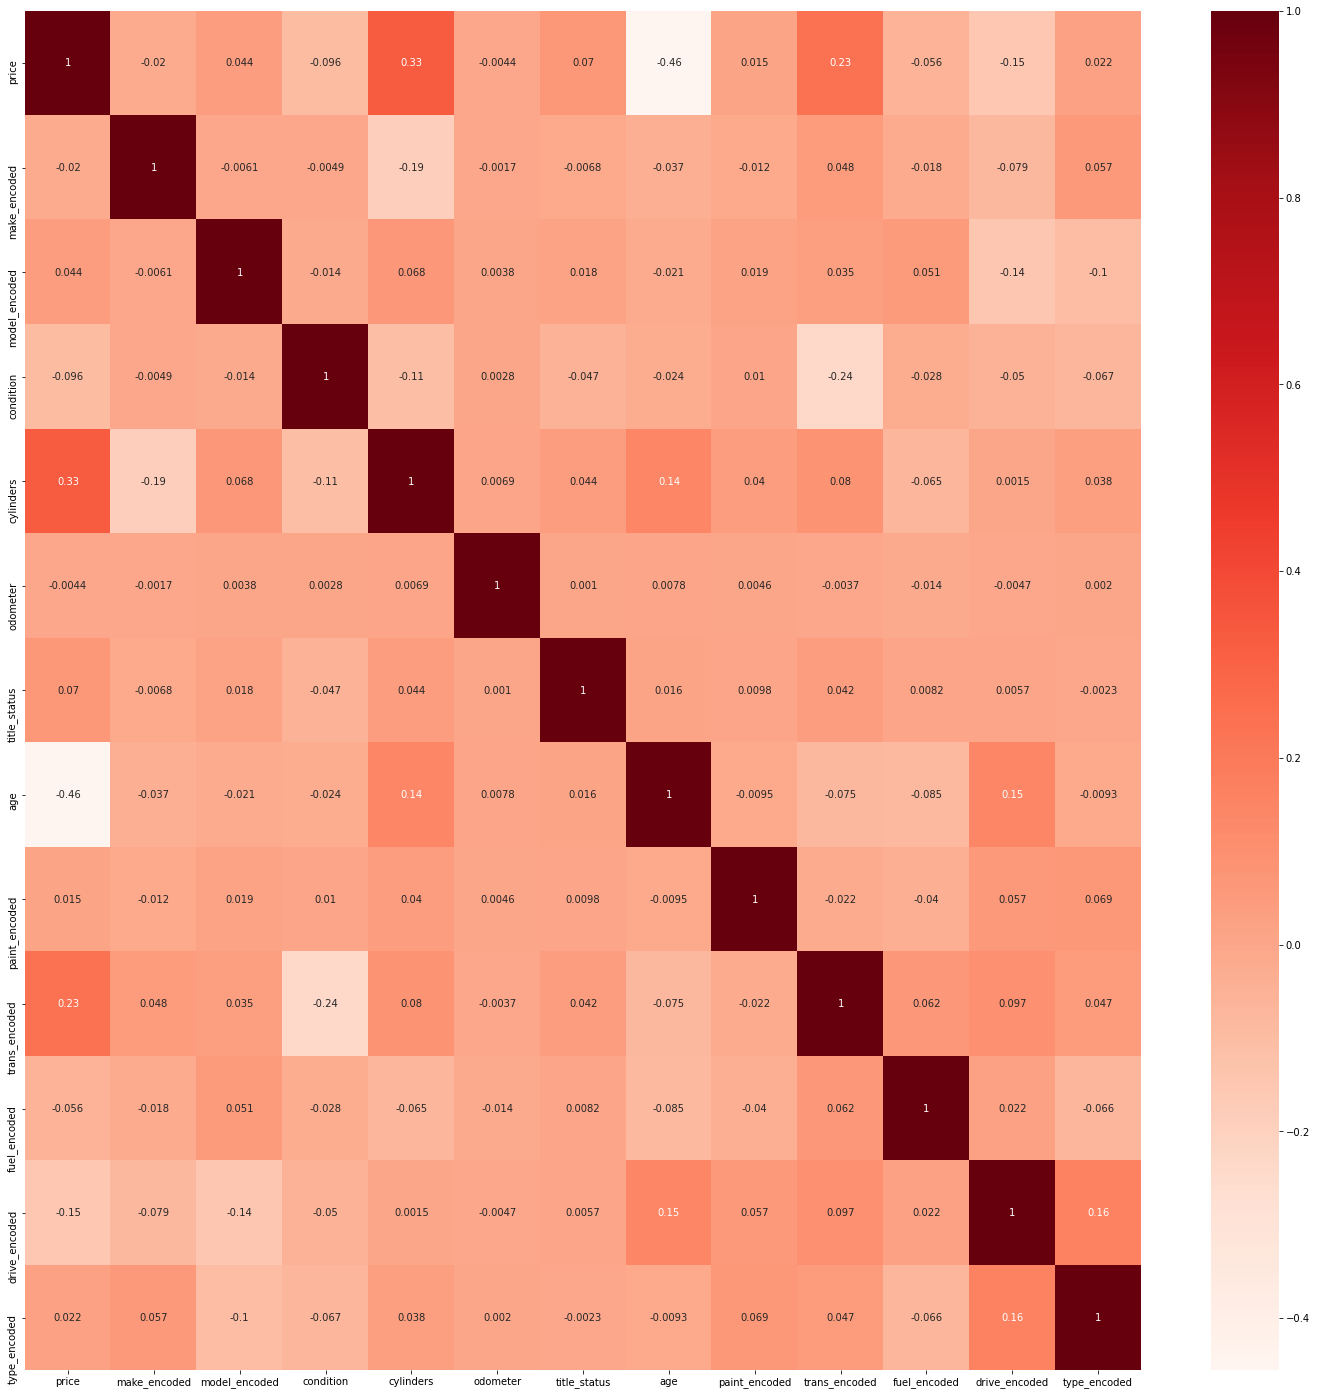

In [ ]:
plt.figure(figsize=(25,25))
cor = vehicles_tree_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

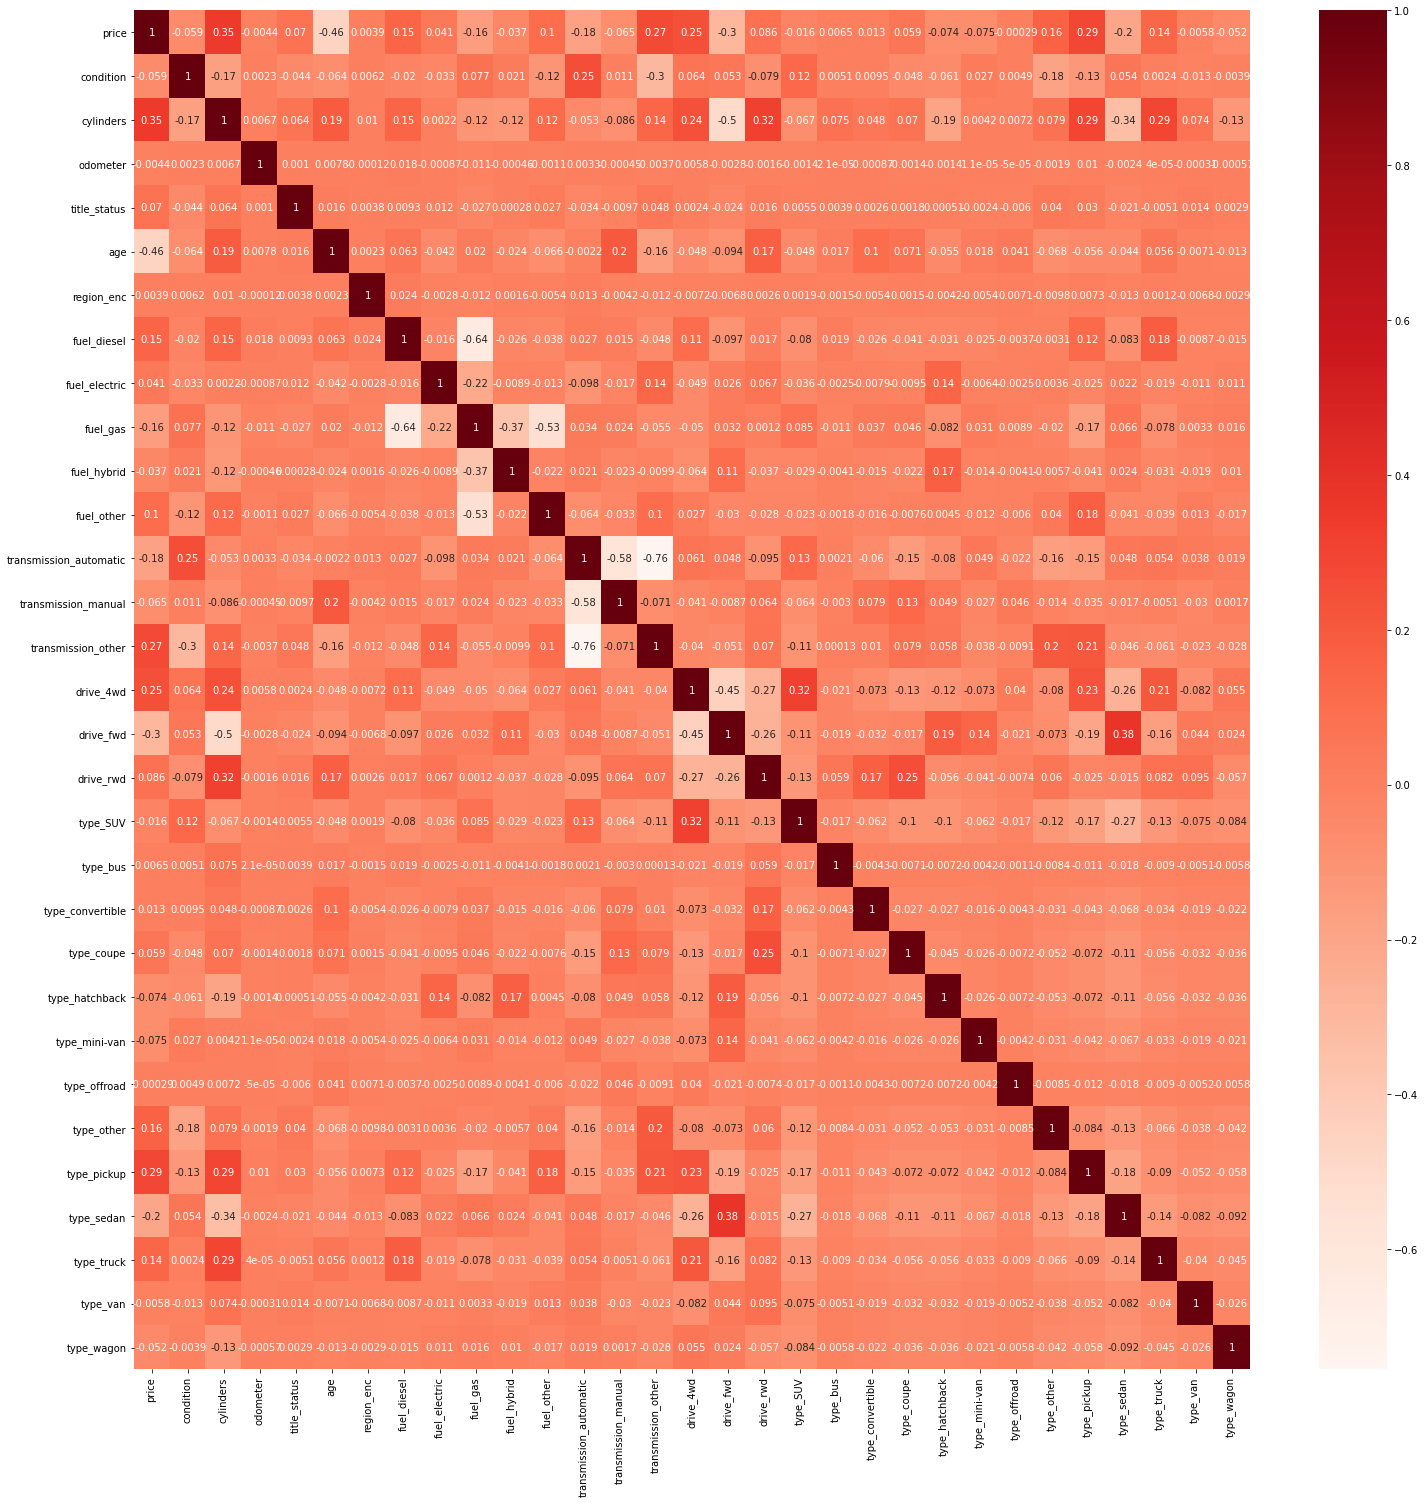

In [ ]:
plt.figure(figsize=(25,25))
cor = vehicles_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
vehicles_final=vehicles_final.dropna()

In [ ]:
vehicles_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34995 entries, 369 to 458062
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   34995 non-null  int64  
 1   manufacturer            34995 non-null  object 
 2   model                   34995 non-null  object 
 3   condition               34995 non-null  float64
 4   cylinders               34995 non-null  float64
 5   odometer                34995 non-null  float64
 6   title_status            34995 non-null  float64
 7   age                     34995 non-null  float64
 8   paint_color             34995 non-null  object 
 9   region_enc              34995 non-null  float64
 10  fuel_diesel             34995 non-null  uint8  
 11  fuel_electric           34995 non-null  uint8  
 12  fuel_gas                34995 non-null  uint8  
 13  fuel_hybrid             34995 non-null  uint8  
 14  fuel_other              34995 non-n

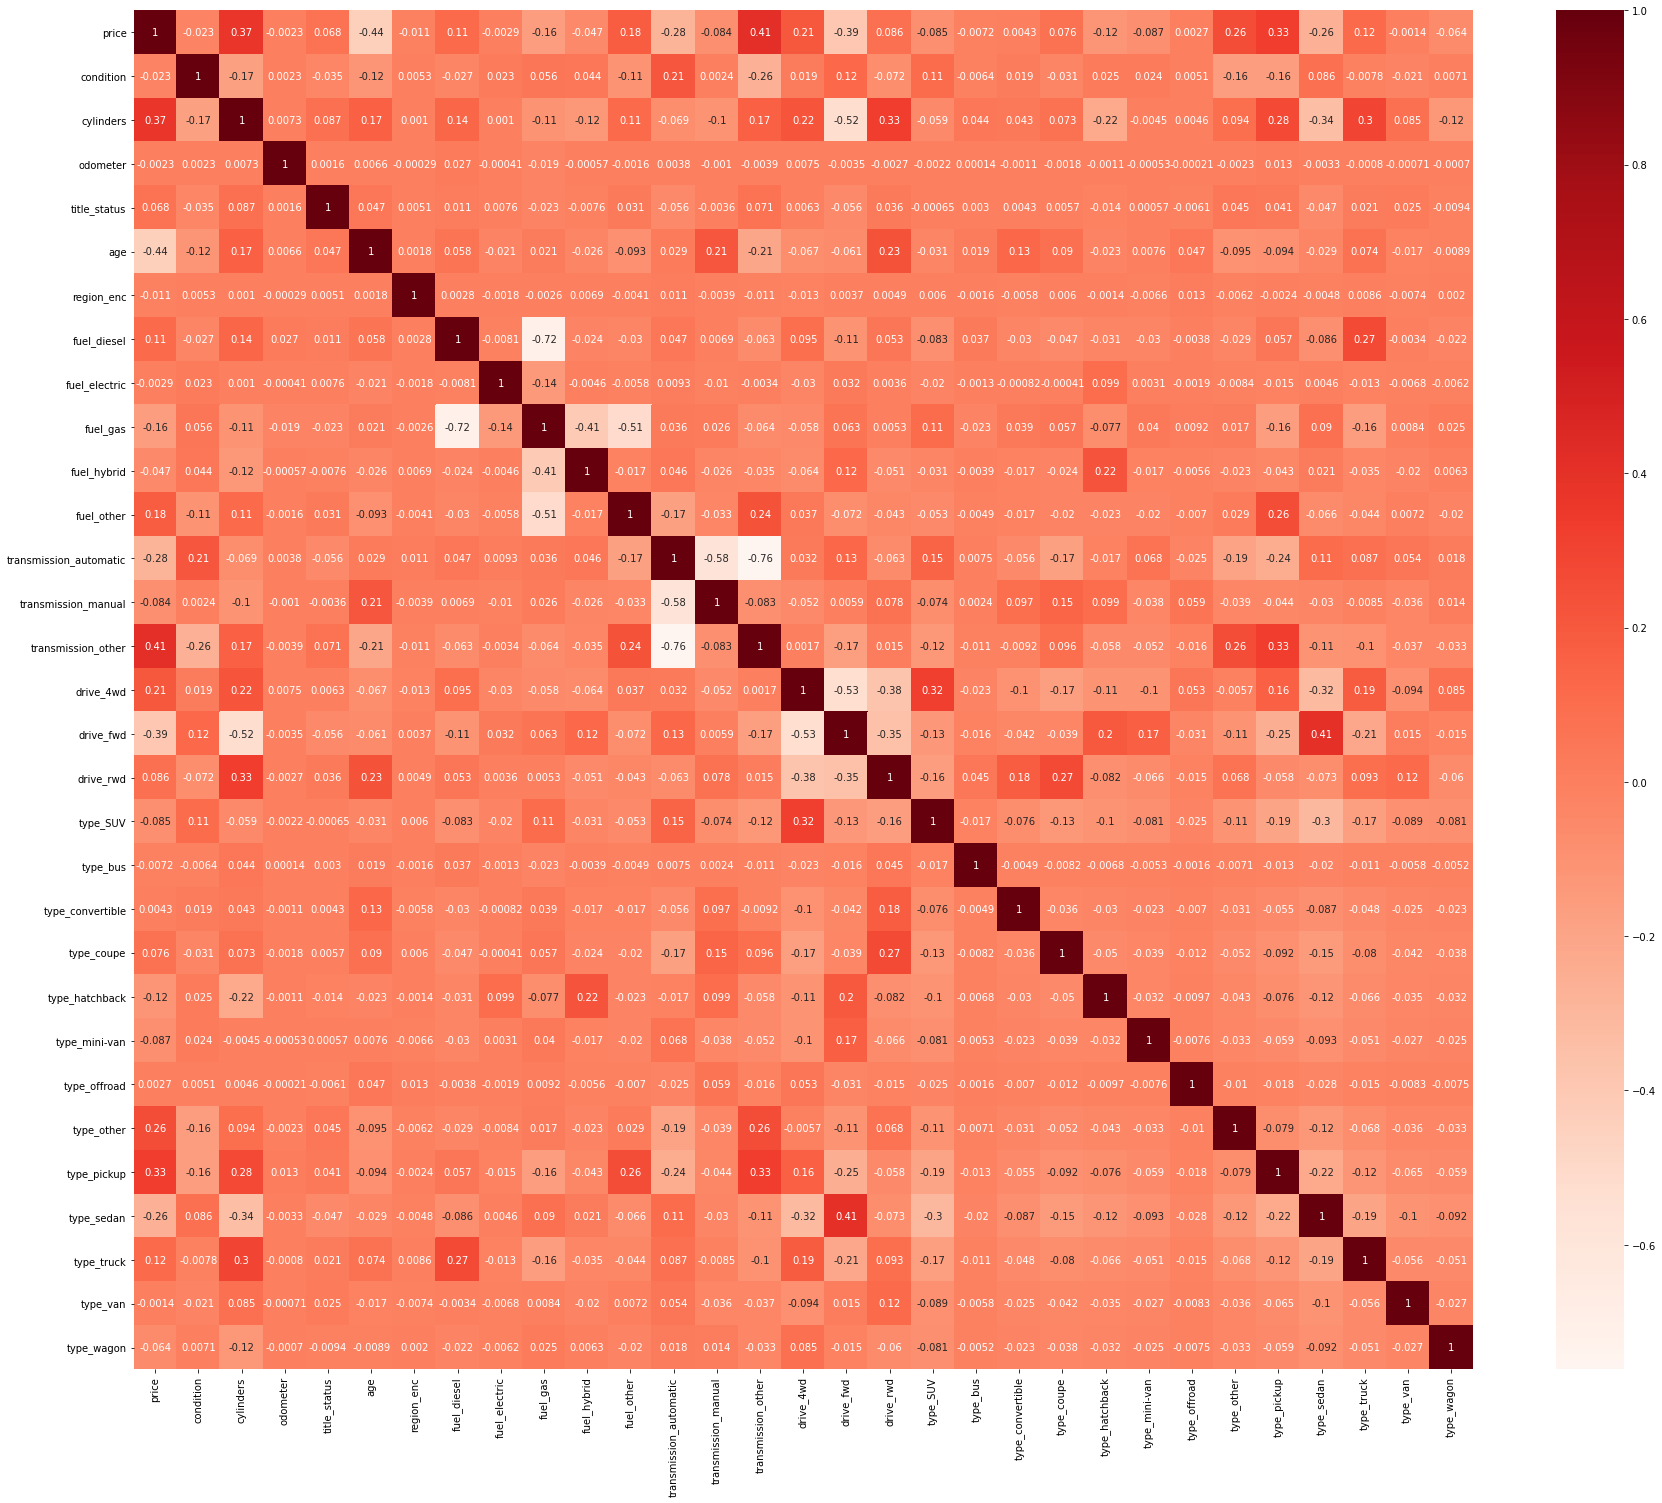

In [ ]:
plt.figure(figsize=(30,25))
cor = vehicles_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1]:
#convert columns to categorical
#col_cat=['make_encoded','model_encoded','fuel_diesel','fuel_electric','fuel_gas','fuel_hybrid','fuel_other','transmission_automatic', 	'transmission_manual', 	'transmission_other'  ,	'drive_4wd' ,	'drive_fwd' ,	'drive_rwd'  ,	'type_SUV' ,	'type_bus', 	'type_convertible' ,	'type_coupe' ,	'type_hatchback' ,	'type_mini-van', 	'type_offroad' ,	'type_other' ,	'type_pickup' ,	'type_sedan' ,	'type_truck' 	,'type_van' ,	'type_wagon' ,	'paint_encoded']
#for col in col_cat:
#  vehicles_final[col] = vehicles_final[col].astype('category',copy=False)

In [ ]:
col_cat_tree=['make_encoded','model_encoded','paint_encoded', 'trans_encoded','fuel_encoded','drive_encoded','type_encoded']
for col in col_cat_tree:
  vehicles_tree_final[col] = vehicles_tree_final[col].astype('category',copy=False)

In [ ]:
vehicles_final['price']=vehicles_final['price'].astype("float64")
vehicles_final['cylinders']=vehicles_final['cylinders'].astype("float64")

In [ ]:
vehicles_final.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
vehicles_final["odometer"] = np.sqrt(preprocessing.minmax_scale(vehicles_final["odometer"]))

In [ ]:
vehicles_final.to_csv("vehicles_cleaned_data.csv")

In [ ]:
#x=vehicles_final[:,~vehicles_final["price"]]
x=vehicles_final.loc[:, ~vehicles_final.columns.isin(['price'])]
y=vehicles_final["price"]

In [ ]:
vehicles_tree_final=vehicles_tree_final.dropna()

In [ ]:
vehicles_tree_final.to_csv("vehicles_tree_cleaned.csv")

In [ ]:
out = vehicles_tree_final['price']
removed_outliers = out.between(out.quantile(.05), out.quantile(.95))
removed_outliers

In [ ]:
print(removed_outliers.value_counts())

In [ ]:
index_names = vehicles_tree_final[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting 11027 prices to drop.

In [ ]:

vehicles_tree_final.drop(index_names, inplace=True)

In [ ]:
vehicles_tree_final.info()

In [ ]:

x_tree=vehicles_tree_final.loc[:, ~vehicles_tree_final.columns.isin(['price'])]
y_tree=vehicles_tree_final["price"]

## Build Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size=0.25, 
                                                    random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf = RandomForestRegressor(n_estimators = 100,random_state=1).fit(x_train, y_train.values.ravel())
rf_pred = rf.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_tree,y_tree, 
                                                    test_size=0.25, 
                                                    random_state=1)

In [ ]:

rf = RandomForestRegressor(random_state=1).fit(x_train, y_train.values.ravel())
rf_pred = rf.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))